# Data Gen

In [8]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

### Train data

In [3]:
train_labels = []
train_samples = []

In [7]:
for i in range(50):
    younger_rnd = randint(13, 64)
    train_samples.append(younger_rnd)
    train_labels.append(1)
    
    older_rnd = randint(65, 100)
    train_samples.append(older_rnd)
    train_labels.append(0)

for i in range(1000):
    younger_rnd = randint(13, 64)
    train_samples.append(younger_rnd)
    train_labels.append(0)
    
    older_rnd = randint(65, 100)
    train_samples.append(older_rnd)
    train_labels.append(1)

In [9]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_samples_scald = scaler.fit_transform(train_samples.reshape(-1, 1)) # fit_transform function dosnt allow 1-D data

In [23]:
train_samples_scald.shape

(2200, 1)

# Simple NN

In [18]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_accuracy

In [19]:
_gpu = tf.config.experimental.list_physical_devices('GPU')
print(f'Number of GPU: {_gpu}')
if _gpu:
    tf.config.experimental.set_memory_growth(_gpu[0], True)

Number of GPU: []


In [27]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Optimiz and Compile with Loss

In [28]:
optim = Adam(learning_rate=0.0001)
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the NN or model

In [29]:
model.fit(
    x=train_samples_scald,
    y=train_labels,
    validation_split=0.1,
    batch_size=10,
    epochs=30,
    shuffle=True,
    verbose=2
)                                      # validation done before shuffle

Epoch 1/30
198/198 - 1s - loss: 0.6471 - accuracy: 0.5520 - val_loss: 0.6380 - val_accuracy: 0.6045
Epoch 2/30
198/198 - 0s - loss: 0.6207 - accuracy: 0.6247 - val_loss: 0.6095 - val_accuracy: 0.6909
Epoch 3/30
198/198 - 0s - loss: 0.5942 - accuracy: 0.7025 - val_loss: 0.5850 - val_accuracy: 0.7409
Epoch 4/30
198/198 - 0s - loss: 0.5702 - accuracy: 0.7298 - val_loss: 0.5608 - val_accuracy: 0.7773
Epoch 5/30
198/198 - 0s - loss: 0.5468 - accuracy: 0.7540 - val_loss: 0.5374 - val_accuracy: 0.8000
Epoch 6/30
198/198 - 0s - loss: 0.5241 - accuracy: 0.7904 - val_loss: 0.5149 - val_accuracy: 0.7955
Epoch 7/30
198/198 - 0s - loss: 0.5026 - accuracy: 0.8096 - val_loss: 0.4937 - val_accuracy: 0.8273
Epoch 8/30
198/198 - 0s - loss: 0.4824 - accuracy: 0.8343 - val_loss: 0.4741 - val_accuracy: 0.8318
Epoch 9/30
198/198 - 0s - loss: 0.4642 - accuracy: 0.8429 - val_loss: 0.4562 - val_accuracy: 0.8455
Epoch 10/30
198/198 - 0s - loss: 0.4477 - accuracy: 0.8470 - val_loss: 0.4399 - val_accuracy: 0.8636

### Test data

In [34]:
test_labels = []
test_samples = []

In [35]:
for i in range(10):
    younger_rnd = randint(13, 64)
    test_samples.append(younger_rnd)
    test_labels.append(1)
    
    older_rnd = randint(65, 100)
    test_samples.append(older_rnd)
    test_labels.append(0)

for i in range(200):
    younger_rnd = randint(13, 64)
    test_samples.append(younger_rnd)
    test_labels.append(0)
    
    older_rnd = randint(65, 100)
    test_samples.append(older_rnd)
    test_labels.append(1)

In [36]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, train_samples = shuffle(test_labels, test_samples)

In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))
test_samples_scald = scaler.fit_transform(test_samples.reshape(-1, 1)) # fit_transform function dosnt allow 1-D data

### predict

In [38]:
preds = model.predict(test_samples_scald, batch_size=10, verbose=2)

42/42 - 0s


In [86]:
preds

array([[0.46039397, 0.53960603],
       [0.4063723 , 0.59362763],
       [0.8472458 , 0.15275416],
       [0.05594698, 0.94405305],
       [0.92297184, 0.07702813],
       [0.2830167 , 0.71698326],
       [0.9254531 , 0.07454687],
       [0.04667596, 0.953324  ],
       [0.46039397, 0.53960603],
       [0.08469243, 0.9153076 ],
       [0.8165184 , 0.18348159],
       [0.35452494, 0.64547503],
       [0.92337704, 0.07662299],
       [0.04132741, 0.95867264],
       [0.9237316 , 0.07626839],
       [0.26121575, 0.7387842 ],
       [0.8995979 , 0.10040209],
       [0.11331875, 0.8866813 ],
       [0.9254531 , 0.07454686],
       [0.09509657, 0.9049035 ],
       [0.7994439 , 0.20055608],
       [0.1693525 , 0.8306475 ],
       [0.7812062 , 0.21879375],
       [0.03887798, 0.96112204],
       [0.9188876 , 0.08111238],
       [0.10662991, 0.89337003],
       [0.92337704, 0.07662299],
       [0.12086834, 0.87913173],
       [0.9242152 , 0.07578477],
       [0.07988705, 0.9201129 ],
       [0.

In [40]:
preds_round = np.argmax(preds, axis=-1)

In [41]:
preds_round

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

### Evaluate the model performence

In [55]:
from sklearn.metrics import plot_confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [78]:
cm = confusion_matrix(y_true=test_labels, y_pred=preds_round, normalize=None)
print(cm)

[[111  99]
 [ 93 117]]


Text(87.02500000000006, 0.5, 'true')

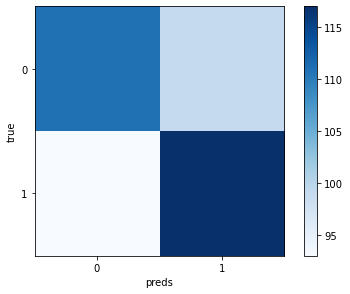

In [79]:
classes = [0, 1]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
plt.tight_layout()
plt.xlabel('preds')
plt.ylabel('true')

In [80]:
import seaborn as sns

<AxesSubplot:>

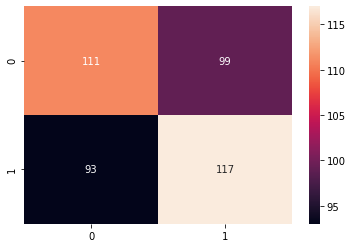

In [84]:
sns.heatmap(cm, annot=True, fmt='')

In [ ]:
if False:
    model.save()
    model.save_weights()

    model.to_json()
    model.to_yaml()